In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import Image
import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL as pil
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import tensorflow as tf


np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/lo

In [2]:
import shutil
from keras.preprocessing.image import ImageDataGenerator

# Create the Data Set

In [10]:
original_dataset_dir = '/home/csizsek/projects/deep-learning-with-python/data/catsdogs/train/'

base_dir = '/home/csizsek/projects/deep-learning-with-python/data/catsdogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Build Our Own ConvNet

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch:', data_batch.shape)
    print('labels batch:', labels_batch.shape)
    break

('data batch:', (20, 150, 150, 3))
('labels batch:', (20,))


In [10]:
history = model.fit_generator(
                        train_generator,
                        steps_per_epoch=100,
                        epochs=30,
                        validation_data=validation_generator,
                        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s - loss: 0.6921 - acc: 0.5280 - val_loss: 0.6708 - val_acc: 0.6200
Epoch 2/30
100/100 [==============================] - 4s - loss: 0.6621 - acc: 0.6010 - val_loss: 0.6678 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 4s - loss: 0.6189 - acc: 0.6660 - val_loss: 0.7156 - val_acc: 0.5680
Epoch 4/30
100/100 [==============================] - 4s - loss: 0.5792 - acc: 0.7000 - val_loss: 0.6050 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 4s - loss: 0.5420 - acc: 0.7170 - val_loss: 0.6094 - val_acc: 0.6600
Epoch 6/30
100/100 [==============================] - 4s - loss: 0.5129 - acc: 0.7510 - val_loss: 0.5951 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 4s - loss: 0.4879 - acc: 0.7725 - val_loss: 0.5942 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 4s - loss: 0.4632 - acc: 0.7785 - val_loss: 0.5978 - val_acc: 0.6800
Epoch 9/30
100/1

In [11]:
model.save('cats_and_dogs_small_1.h5')

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

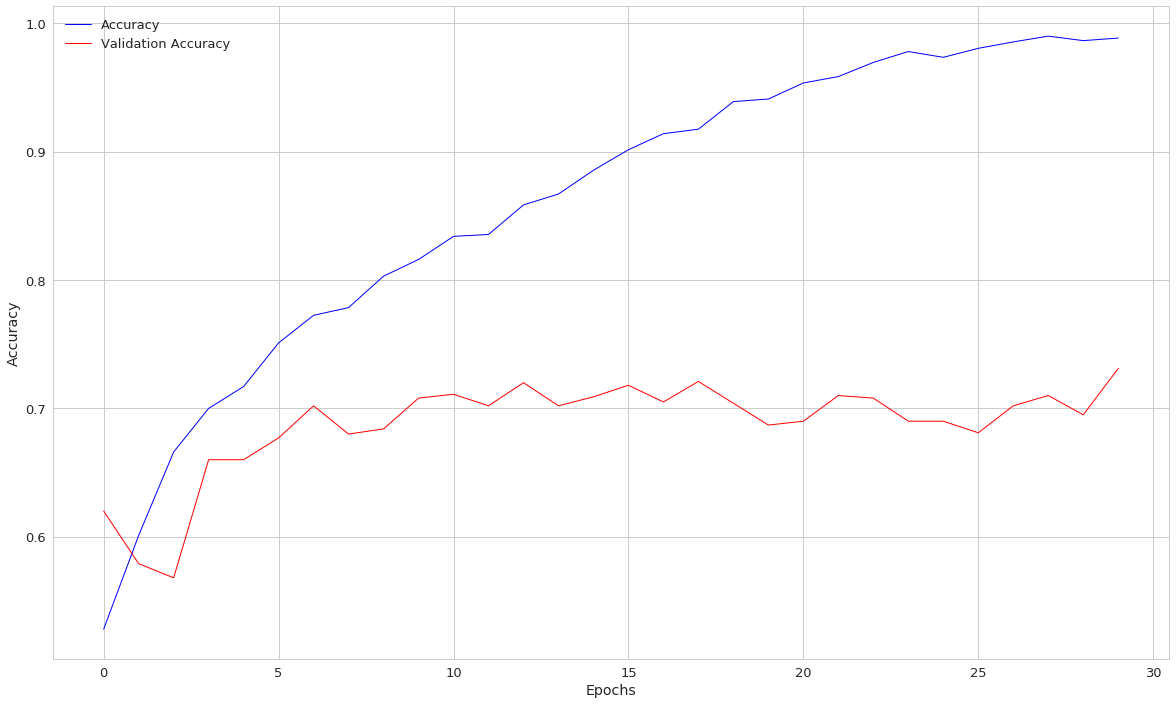

In [13]:
_ = plt.plot(epochs, acc, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

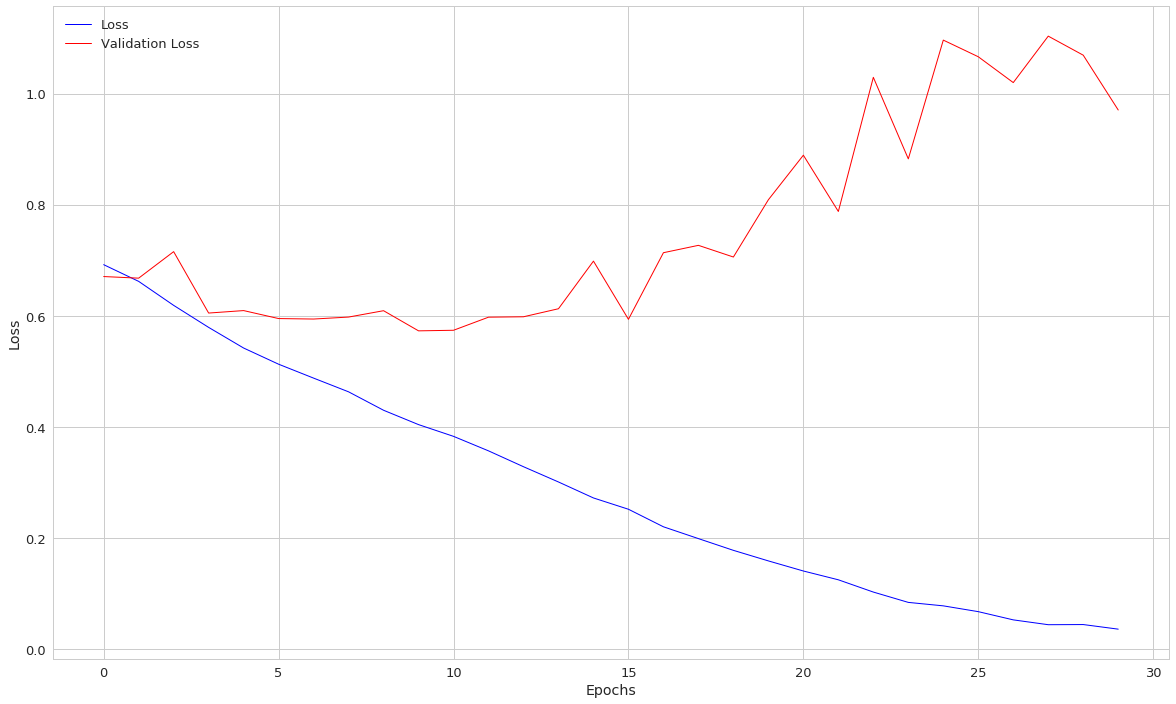

In [14]:
_ = plt.plot(epochs, loss, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

# Try Data Augmentation

In [15]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

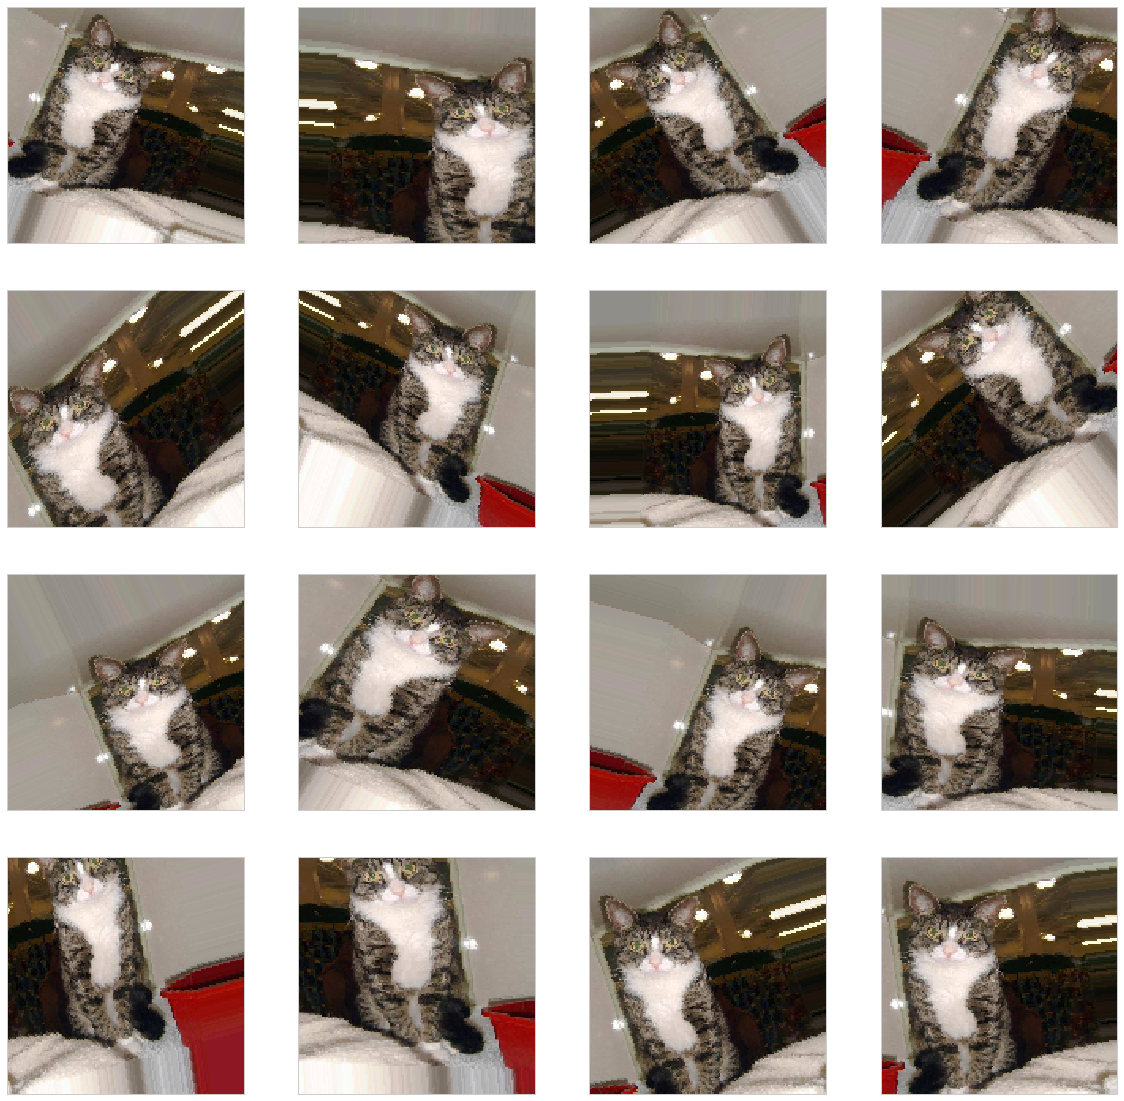

In [16]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
x = keras.preprocessing.image.img_to_array(img)
x = x.reshape((1,) + x.shape)

_ = plt.figure(figsize=(20, 20))
i = 0
for batch in datagen.flow(x, batch_size=1):
    ax = plt.subplot(4, 4, i+1)
    _ = plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    i += 1
    if i == 16:
        break

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(150, 150),
                                    batch_size=32,
                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    samples_per_epoch=2000,
                    epochs=15,
                    validation_data=validation_generator,
                    nb_val_samples=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=15, validation_steps=1000)`


Epoch 1/15
62/62 [==============================] - 63s - loss: 0.6936 - acc: 0.5030 - val_loss: 0.6831 - val_acc: 0.5867
Epoch 2/15
62/62 [==============================] - 61s - loss: 0.6798 - acc: 0.5665 - val_loss: 0.6600 - val_acc: 0.5834
Epoch 3/15
62/62 [==============================] - 60s - loss: 0.6733 - acc: 0.5670 - val_loss: 0.6576 - val_acc: 0.5898
Epoch 4/15
62/62 [==============================] - 59s - loss: 0.6634 - acc: 0.5867 - val_loss: 0.6601 - val_acc: 0.5831
Epoch 5/15
62/62 [==============================] - 61s - loss: 0.6537 - acc: 0.5953 - val_loss: 0.6400 - val_acc: 0.6081
Epoch 6/15
62/62 [==============================] - 61s - loss: 0.6446 - acc: 0.6230 - val_loss: 0.6227 - val_acc: 0.6541
Epoch 7/15
62/62 [==============================] - 62s - loss: 0.6270 - acc: 0.6366 - val_loss: 0.6305 - val_acc: 0.6210
Epoch 8/15
62/62 [==============================] - 60s - loss: 0.6247 - acc: 0.6421 - val_loss: 0.6061 - val_acc: 0.6498
Epoch 9/15
62/62 [======

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

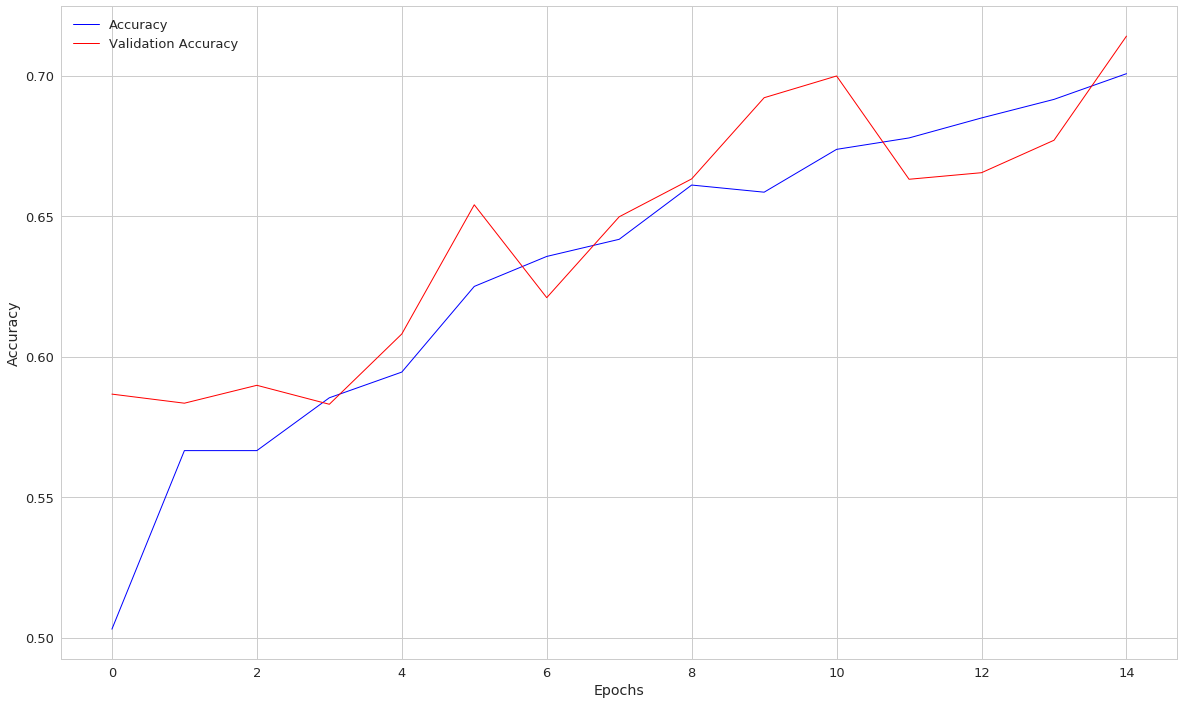

In [21]:
_ = plt.plot(epochs, acc, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

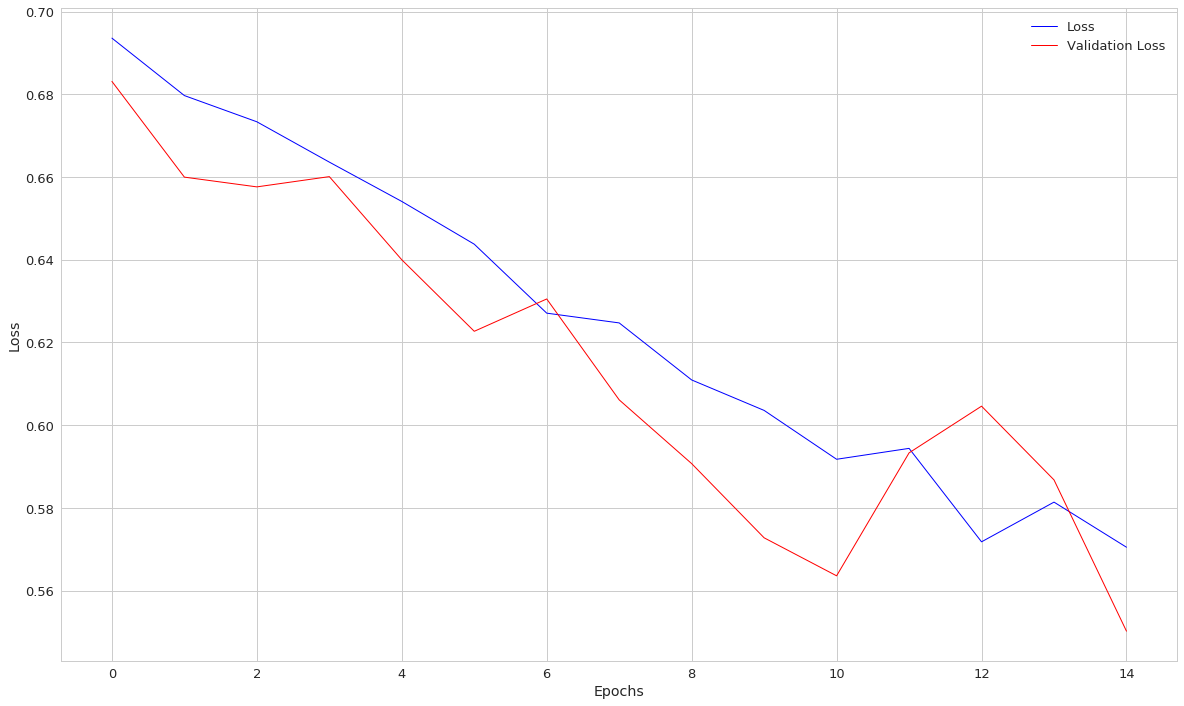

In [22]:
_ = plt.plot(epochs, loss, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

# Load the VGG16 Pre-Trained Model

In [23]:
conv_base = keras.applications.VGG16(
                weights='imagenet',
                include_top=False,
                input_shape=(150, 150, 3))

In [24]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# Approach 1: Use the Pre-Trained Model's Output as Our Input

In [25]:
base_dir = '/home/csizsek/projects/deep-learning-with-python/data/catsdogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` onces every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        loss='binary_crossentropy',
        metrics=['acc'])

history = model.fit(
            train_features,
            train_labels,
            epochs=30,
            batch_size=20,
            validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 0s - loss: 0.4646 - acc: 0.7630 - val_loss: 0.3111 - val_acc: 0.8830
Epoch 2/30
2000/2000 [==============================] - 0s - loss: 0.2843 - acc: 0.8780 - val_loss: 0.2659 - val_acc: 0.8900
Epoch 3/30
2000/2000 [==============================] - 0s - loss: 0.2384 - acc: 0.9070 - val_loss: 0.2535 - val_acc: 0.8980
Epoch 4/30
2000/2000 [==============================] - 0s - loss: 0.2110 - acc: 0.9190 - val_loss: 0.2437 - val_acc: 0.9000
Epoch 5/30
2000/2000 [==============================] - 0s - loss: 0.1841 - acc: 0.9285 - val_loss: 0.2465 - val_acc: 0.9050
Epoch 6/30
2000/2000 [==============================] - 0s - loss: 0.1551 - acc: 0.9420 - val_loss: 0.2361 - val_acc: 0.9020
Epoch 7/30
2000/2000 [==============================] - 0s - loss: 0.1357 - acc: 0.9510 - val_loss: 0.2427 - val_acc: 0.8960
Epoch 8/30
2000/2000 [==============================] - 0s - loss: 0.1223 - a

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

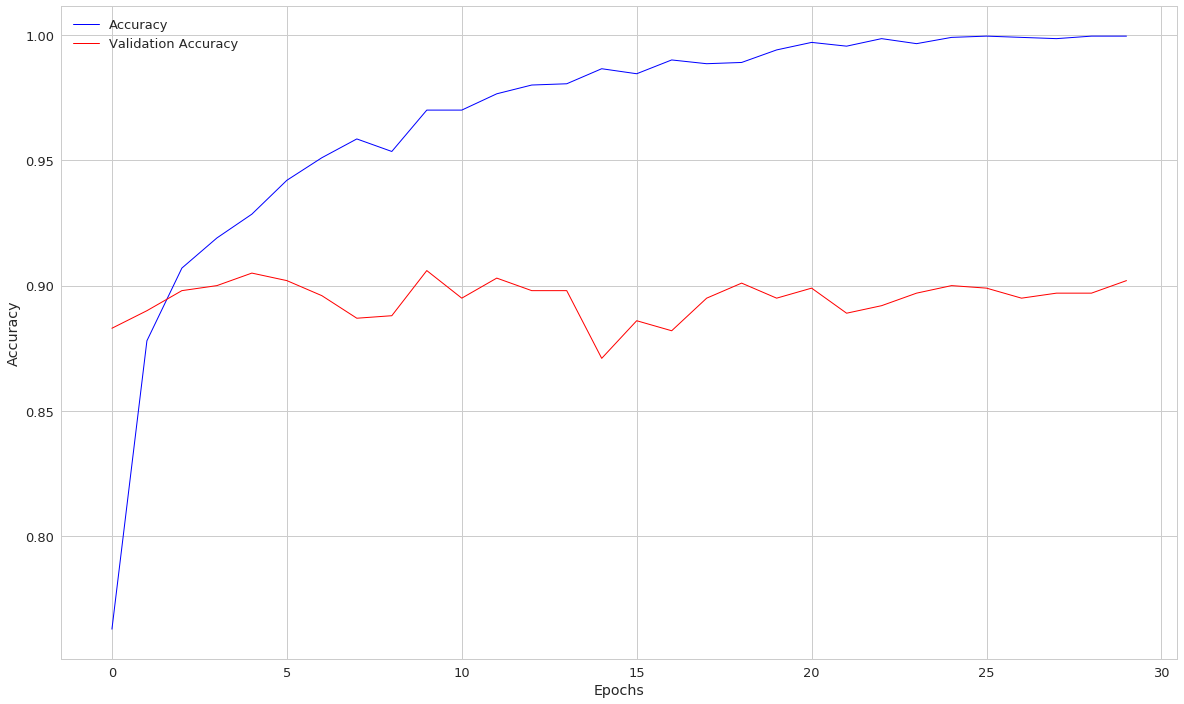

In [29]:
_ = plt.plot(epochs, acc, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

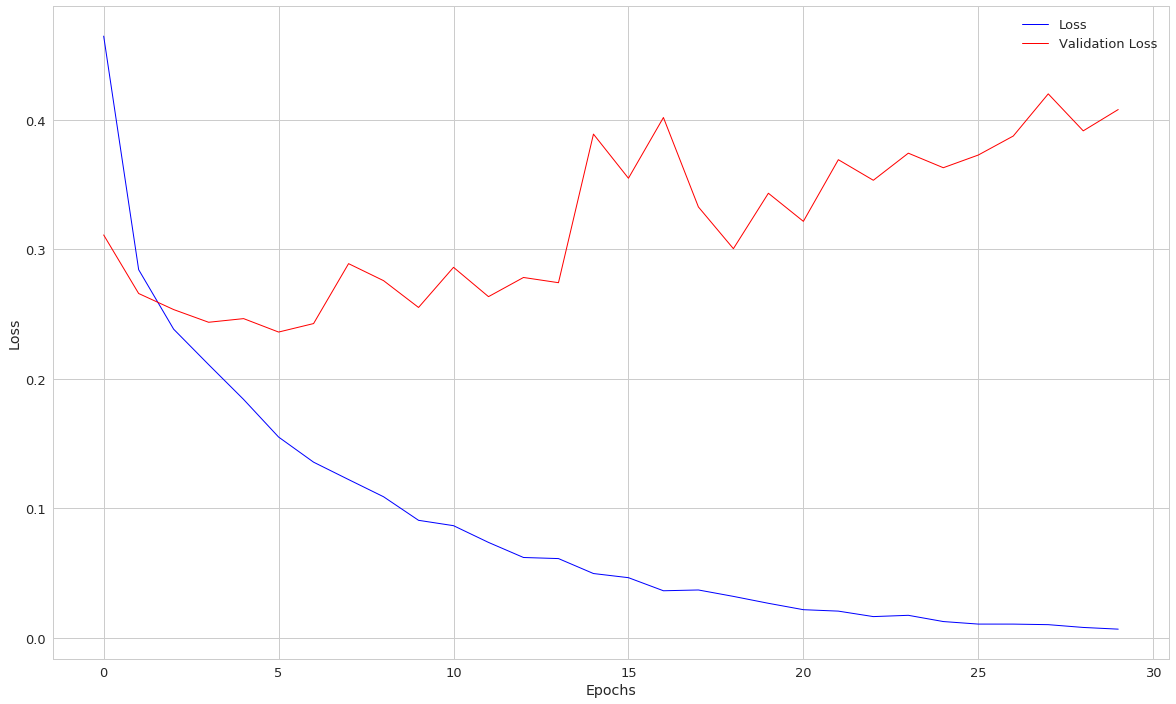

In [30]:
_ = plt.plot(epochs, loss, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

# Approach 2: Extend the Pre-Trained Model with Dense Layers and Re-Train

In [4]:
conv_base = keras.applications.VGG16(
                weights='imagenet',
                include_top=False,
                input_shape=(150, 150, 3))

In [5]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
conv_base.trainable = False

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(150, 150),
                                    batch_size=32,
                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    samples_per_epoch=2000,
                    epochs=15,
                    validation_data=validation_generator,
                    nb_val_samples=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:67: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=15, validation_steps=1000)`


Epoch 1/15
62/62 [==============================] - 121s - loss: 0.7338 - acc: 0.5096 - val_loss: 0.6636 - val_acc: 0.6921
Epoch 2/15
62/62 [==============================] - 126s - loss: 0.6741 - acc: 0.5953 - val_loss: 0.5611 - val_acc: 0.7290
Epoch 3/15
62/62 [==============================] - 125s - loss: 0.5991 - acc: 0.6875 - val_loss: 0.4526 - val_acc: 0.7830
Epoch 4/15
62/62 [==============================] - 126s - loss: 0.5434 - acc: 0.7228 - val_loss: 0.5187 - val_acc: 0.7383
Epoch 5/15
62/62 [==============================] - 125s - loss: 0.4728 - acc: 0.7752 - val_loss: 0.2887 - val_acc: 0.8758
Epoch 6/15
62/62 [==============================] - 125s - loss: 0.4352 - acc: 0.8004 - val_loss: 0.2605 - val_acc: 0.9001
Epoch 7/15
62/62 [==============================] - 124s - loss: 0.3922 - acc: 0.8352 - val_loss: 0.3304 - val_acc: 0.8410
Epoch 8/15
62/62 [==============================] - 124s - loss: 0.3269 - acc: 0.8619 - val_loss: 0.1977 - val_acc: 0.9219
Epoch 9/15
62/62

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

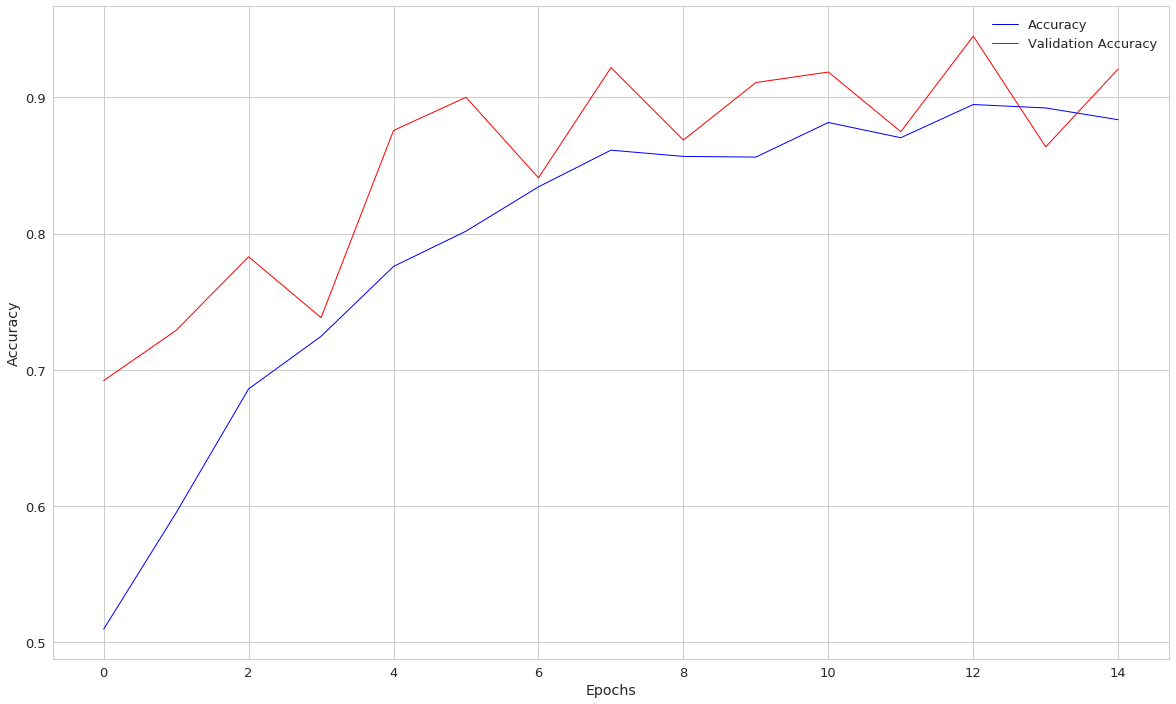

In [16]:
_ = plt.plot(epochs, acc, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

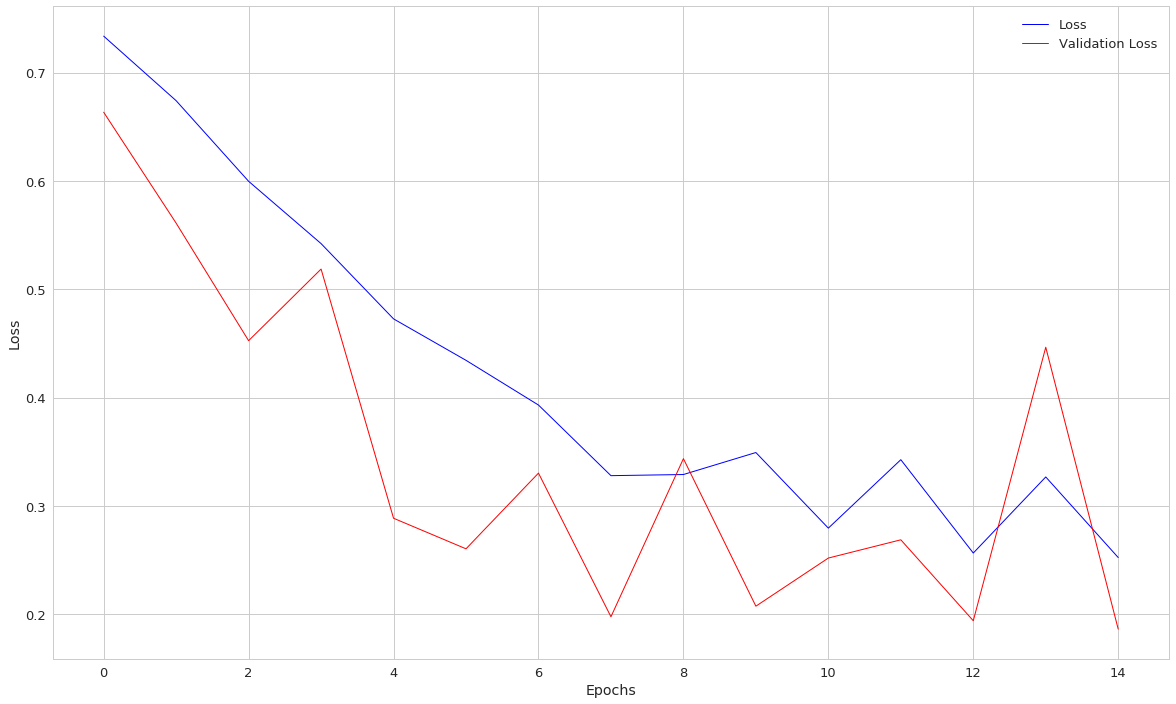

In [17]:
_ = plt.plot(epochs, loss, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

# Approach 3: Extend and Fine-Tune the Pre-Trained Model

In [3]:
conv_base = keras.applications.VGG16(
                weights='imagenet',
                include_top=False,
                input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [8]:
model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                    train_dir,
                                    target_size=(150, 150),
                                    batch_size=32,
                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    samples_per_epoch=2000,
                    epochs=15,
                    validation_data=validation_generator,
                    nb_val_samples=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=15, validation_steps=1000)`


Epoch 1/15
62/62 [==============================] - 107s - loss: 0.5920 - acc: 0.7334 - val_loss: 0.3661 - val_acc: 0.8537
Epoch 2/15
62/62 [==============================] - 107s - loss: 0.4048 - acc: 0.8191 - val_loss: 0.1922 - val_acc: 0.9201
Epoch 3/15
62/62 [==============================] - 108s - loss: 0.3073 - acc: 0.8725 - val_loss: 0.2420 - val_acc: 0.8961
Epoch 4/15
62/62 [==============================] - 110s - loss: 0.2775 - acc: 0.8790 - val_loss: 0.1944 - val_acc: 0.9210
Epoch 5/15
62/62 [==============================] - 111s - loss: 0.2579 - acc: 0.8871 - val_loss: 0.1720 - val_acc: 0.9342
Epoch 6/15
62/62 [==============================] - 111s - loss: 0.2270 - acc: 0.9007 - val_loss: 0.2317 - val_acc: 0.9101
Epoch 7/15
62/62 [==============================] - 111s - loss: 0.2325 - acc: 0.9078 - val_loss: 0.1656 - val_acc: 0.9220
Epoch 8/15
62/62 [==============================] - 111s - loss: 0.2216 - acc: 0.9098 - val_loss: 0.1923 - val_acc: 0.9249
Epoch 9/15
62/62

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

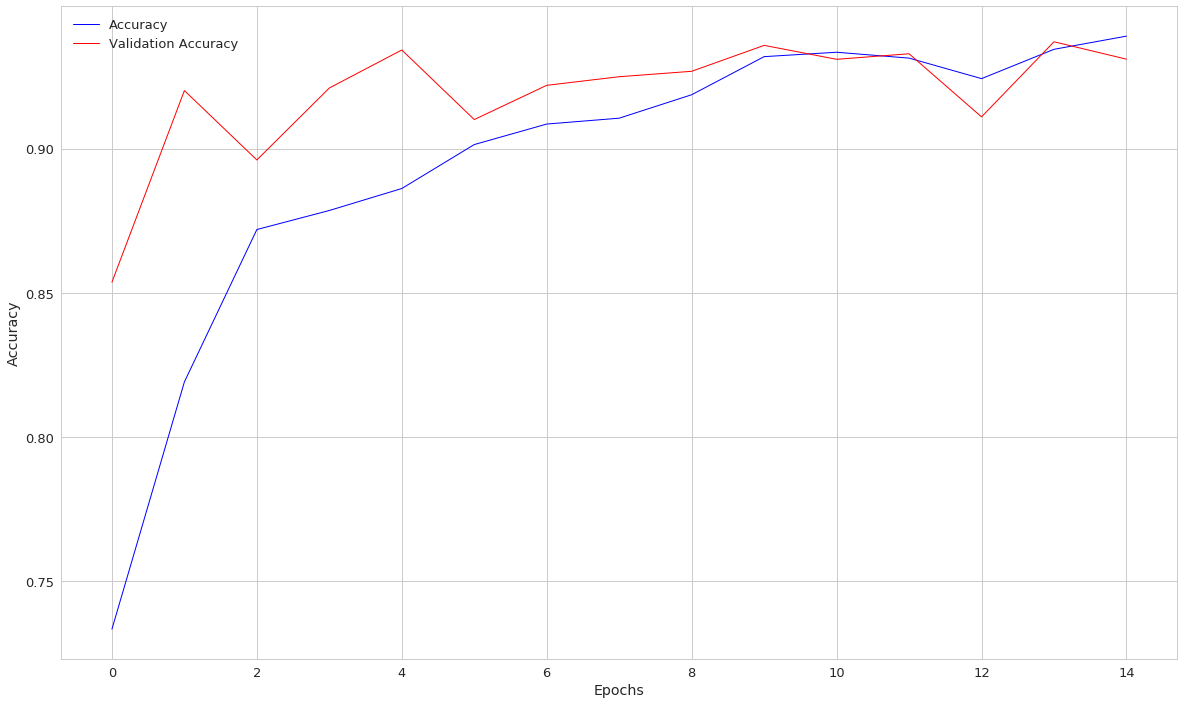

In [13]:
_ = plt.plot(epochs, acc, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

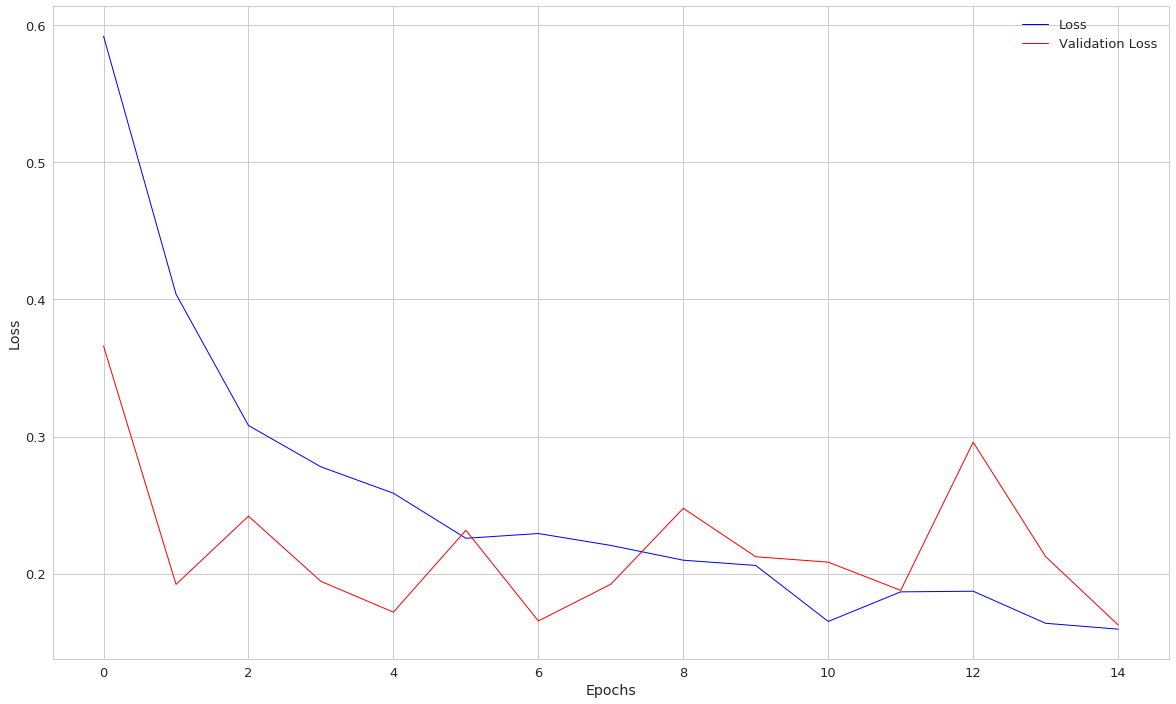

In [14]:
_ = plt.plot(epochs, loss, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

In [15]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, val_samples=1000)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(<keras.pre..., steps=1000)`
  import sys


('test acc:', 0.92699999237060549)
